# Import data in same folder

In [1]:
import csv
with open('chipotle.tsv', 'r') as file:
    file_nested_list = [row for row in csv.reader(file, delimiter='\t')]
header = file_nested_list[0]
data = file_nested_list[1:]

# •Q1. Which was the most-ordered item? 

In [2]:
all_item=[]
for product in data:
    all_item.extend(product[2].split())
from collections import Counter
word_counts = Counter(all_item)
top_three = word_counts.most_common(3)
print('The most-ordered item is',top_three[0])

The most-ordered item is ('Chicken', 1560)


Ans:chicken

# •Q2. What was the most ordered item in the choice_description column?

In [3]:
all_item=[]
for product in data:
    product[3]=product[3].replace('(','')
    product[3]=product[3].replace(')','')
    product[3]=product[3].replace('[','')
    product[3]=product[3].replace(']','')
    product[3]=product[3].replace(',','')
    all_item.extend(product[3].split())
from collections import Counter
word_counts = Counter(all_item)
top_three = word_counts.most_common(3)
print('The most ordered item in the choice_description column is',top_three[0])

The most ordered item in the choice_description column is ('Salsa', 3072)


Ans:Salsa

# •Q3. How much was the revenue for the period in the dataset?

In [4]:
all_prices = []
for price in data:
     all_prices.append(float(price[4].replace('$','')))
sum_price=float("{0:.2f}".format(sum(all_prices)))
print('The total revenue equals to $',sum_price)

The total revenue equals to $ 34500.16


Ans:$34500.16

# •Q4. What is the average revenue amount per order?

In [5]:
all_prices = []
for price in data:
     all_prices.append(float(price[4].replace('$','')))
average_price_per_order = float("{0:.2f}".format(sum(all_prices)/len(all_prices)))
average_price_per_order_id = float("{0:.2f}".format(sum(all_prices)/1834))
print('The average revenue amount per order equals to $',average_price_per_order)
print('The average revenue amount per order ID equals to $',average_price_per_order_id)

The average revenue amount per order equals to $ 7.46
The average revenue amount per order ID equals to $ 18.81


Ans:$7.46 per order ; $18.81 per order_id

# •Q5. Plot the revenue amount per 100 order.
•Summarize the revenue for order_id1-100, 101-200, 201-300, and so forth

•Use histogram to plot the results

[1710.89, 1799.55, 1921.8, 1841.39, 1864.41, 1921.74, 1894.9, 1781.85, 1910.79, 2149.08, 1917.94, 1844.12, 1684.68, 1777.93, 2125.92, 1835.02, 1861.06, 1989.72, 667.37]


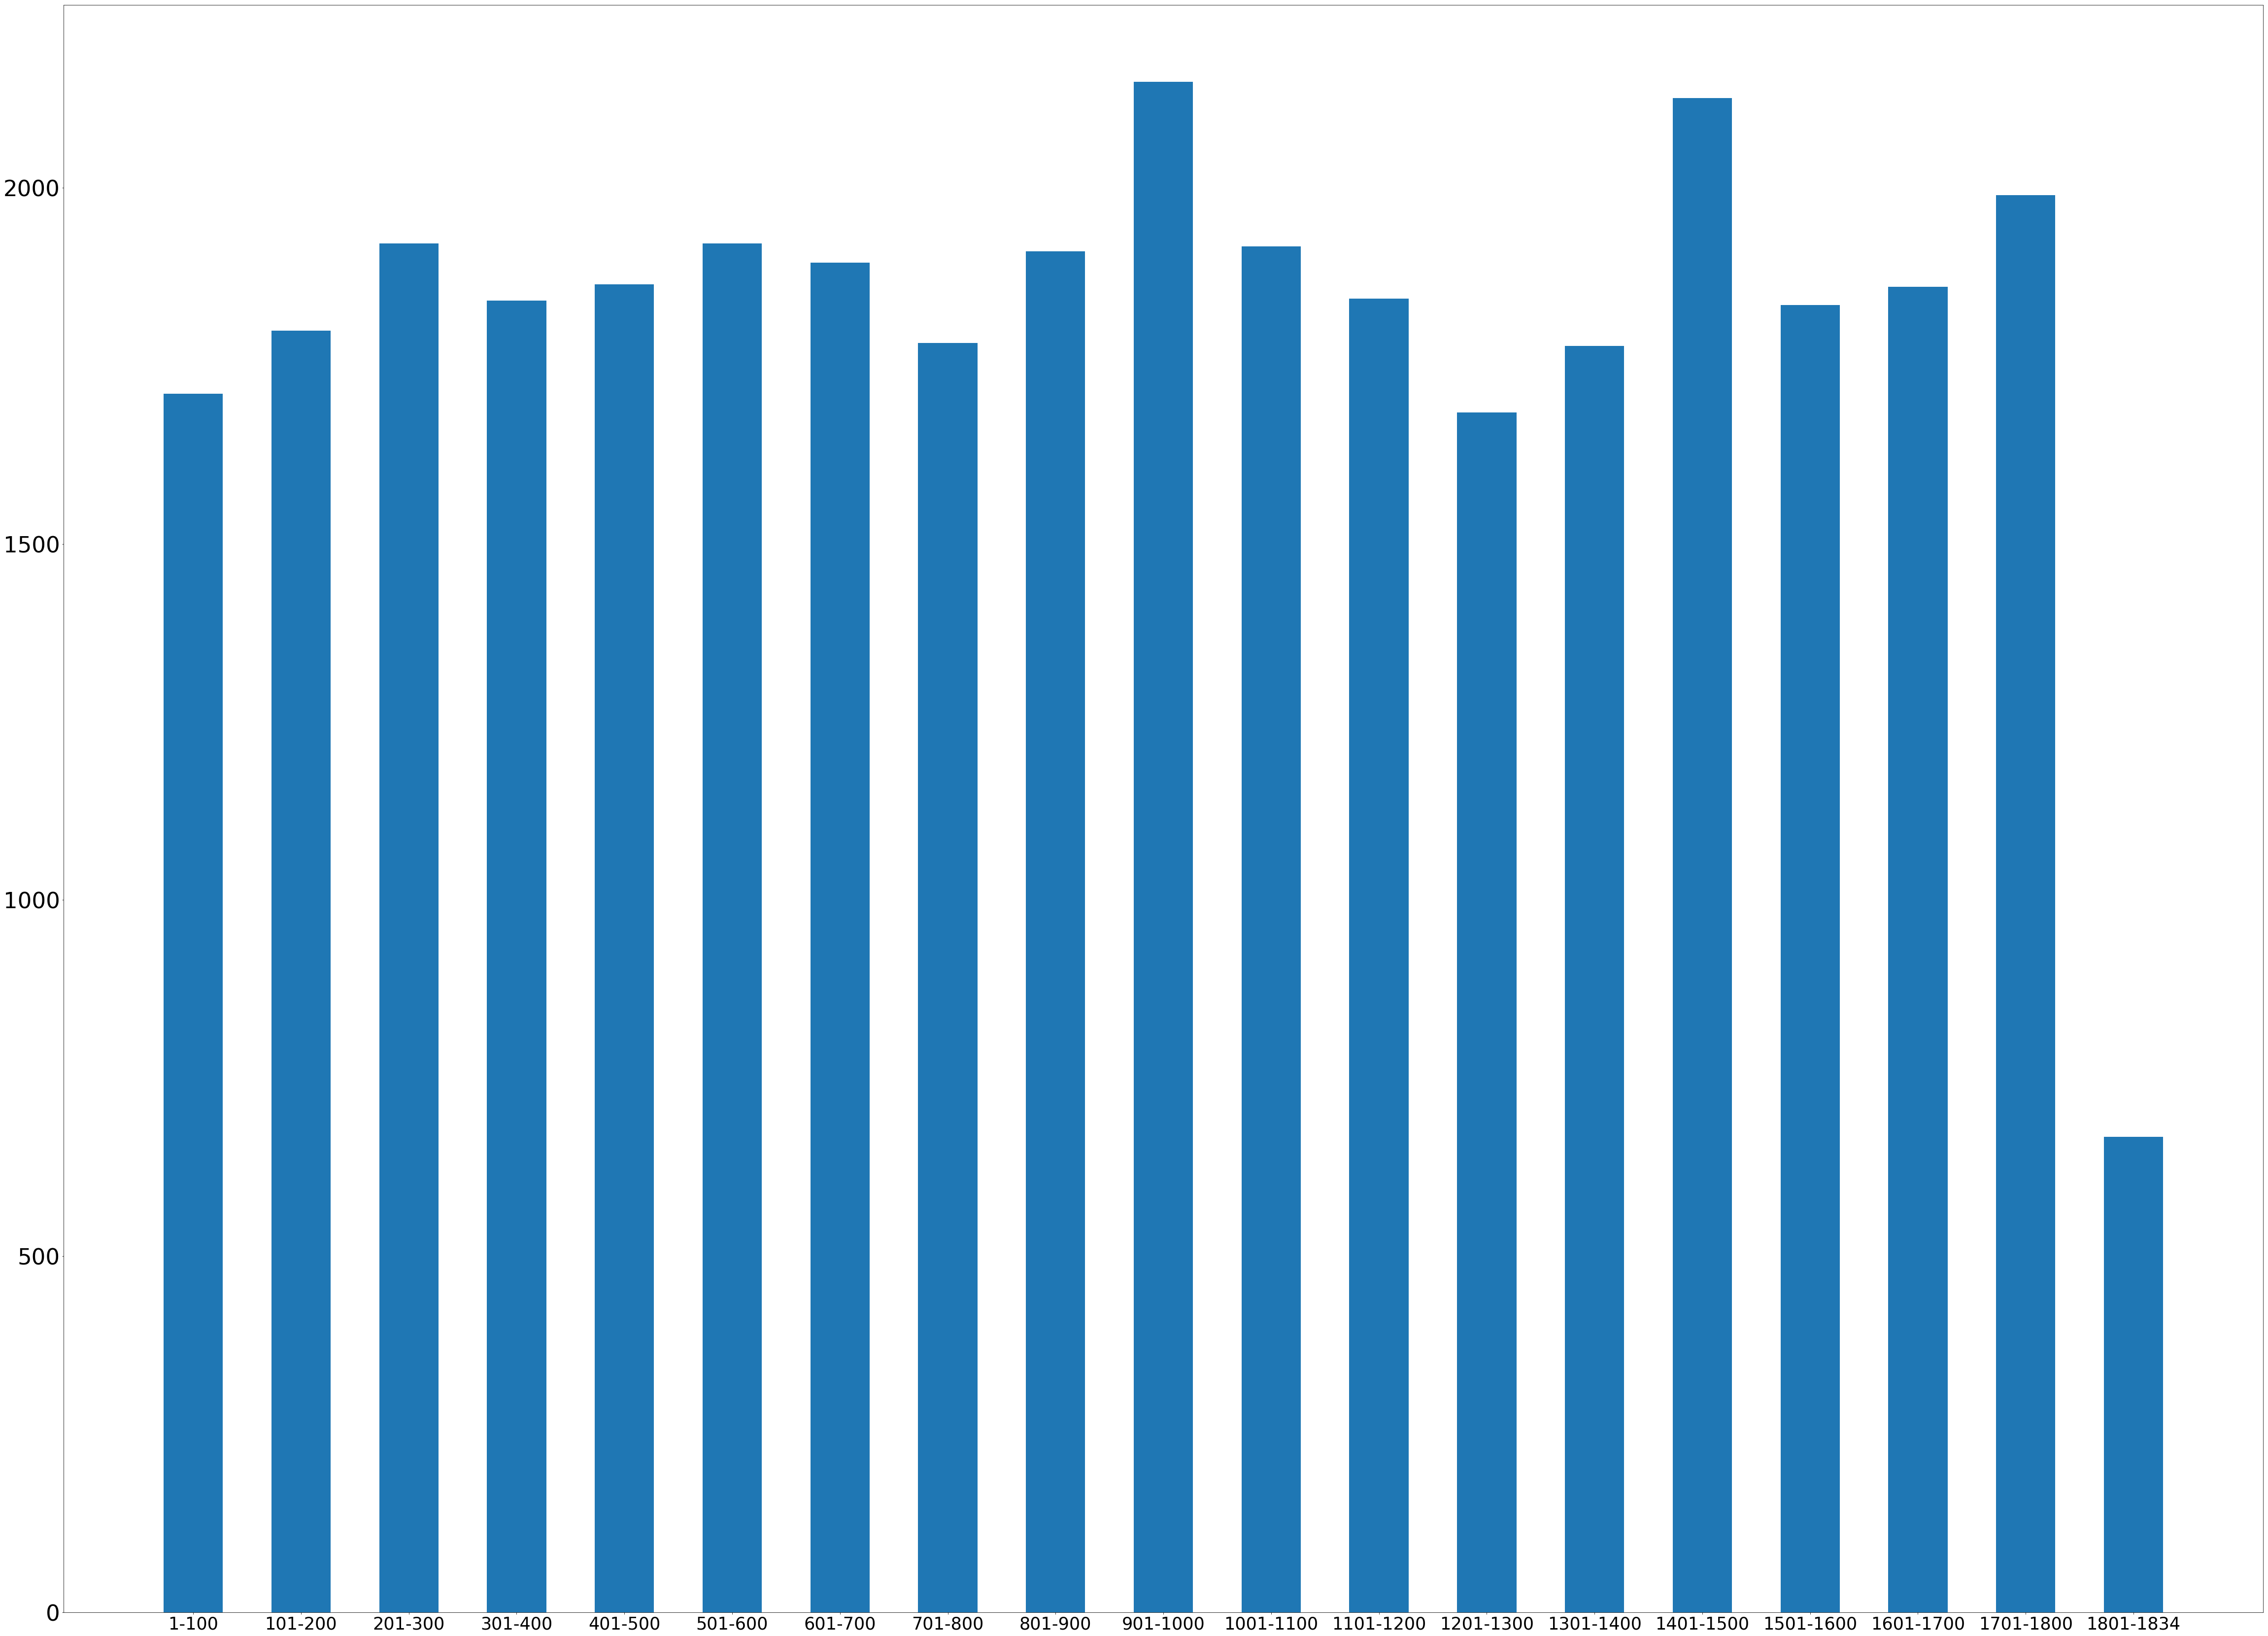

In [7]:
prices_per100=[]
total_per100=[]
for i in range(19):
    for price in data:
        if int(price[0])>=(100*i+1) and int(price[0])<=(100*(i+1)):
            prices_per100.append(float(price[4].replace('$','')))
    total_per100.append(float("{0:.2f}".format(sum(prices_per100))))
    prices_per100=[]

#matplotlib inline
import matplotlib.pyplot as plt
x = ['1-100','101-200','201-300','301-400','401-500','501-600','601-700','701-800',\
     '801-900','901-1000','1001-1100','1101-1200','1201-1300','1301-1400','1401-1500',\
     '1501-1600','1601-1700','1701-1800','1801-1834',]
plt.figure(figsize=(80,60))
plt.bar(x, total_per100, label = '',align = "center",width=0.55)
plt.xticks(fontsize=35)
plt.yticks(fontsize=45)
print(total_per100)